In [1]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 3-DOF nonlinear oscillator Diffusion 1.
"""

'\nThis code belongs to the paper:\n-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 3-DOF nonlinear oscillator Diffusion 1.\n'

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
actual_1 = "Initial_relia_data_3DOF_upto_5000.p"
file_actual_1 = open(actual_1, 'rb')
file_obj_actual_1 = pickle.load(file_actual_1)
actual_1 = np.array(file_obj_actual_1)
actual_1.shape

(6, 5000, 60001)

In [3]:
actual_2 = "Initial_relia_data_3DOF_upto_10000.p"
file_actual_2 = open(actual_2, 'rb')
file_obj_actual_2 = pickle.load(file_actual_2)
actual_2 = np.array(file_obj_actual_2)
actual_2.shape

(6, 5000, 60001)

In [4]:
y5_a_1 = actual_1[4]
y5_a_2 = actual_2[4]
y5_a_1.shape, y5_a_2.shape

((5000, 60001), (5000, 60001))

In [5]:
y5_a = np.vstack((y5_a_1, y5_a_2))
y5_a.shape

(10000, 60001)

In [6]:
Final_1 = "Final_relia_data_3DOF_upto_5000.p"
file_final_1 = open(Final_1, 'rb')
file_obj_final_1 = pickle.load(file_final_1)
Final_1 = np.array(file_obj_final_1)
Final_1.shape

(6, 5000, 60001)

In [7]:
Final_2 = "Final_relia_data_3DOF_upto_10000.p"
file_final_2 = open(Final_2, 'rb')
file_obj_final_2 = pickle.load(file_final_2)
Final_2 = np.array(file_obj_final_2)
Final_2.shape

(6, 5000, 60001)

In [8]:
y5_f_1 = Final_1[4]
y5_f_2 = Final_2[4]
y5_f_1.shape, y5_f_2.shape

((5000, 60001), (5000, 60001))

In [9]:
y5_f = np.vstack((y5_f_1, y5_f_2))
y5_f.shape

(10000, 60001)

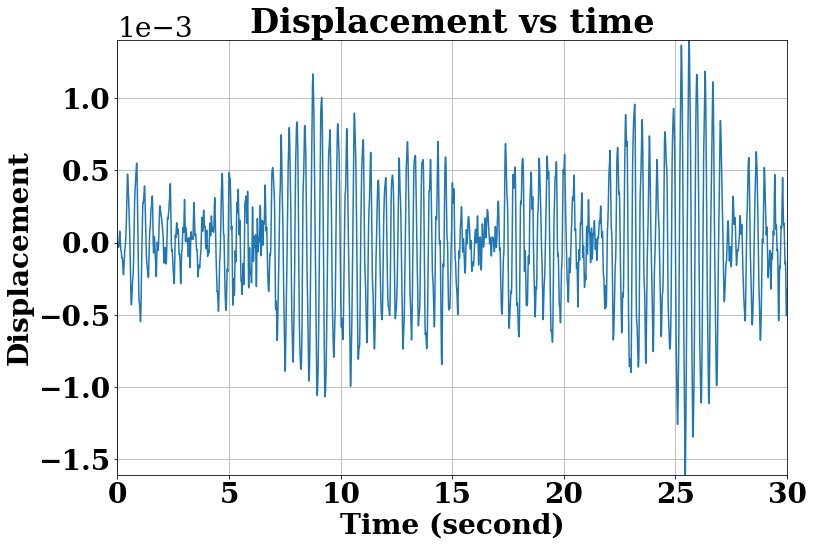

In [37]:
a=np.linspace(0,30,60001)
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 28
plt.figure(figsize = (12,8 ))
plt.xlim()
plt.plot(a,np.mean(y5_f, axis=0))
plt.yticks()
plt.title('Displacement vs time',fontweight='bold')
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Displacement',fontweight='bold')
plt.margins(0)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,-4))
plt.grid()
plt.savefig('states_3dof.png')
plt.show()

In [11]:
threshold = 0.18

Probabilty of Failure : 0.0123


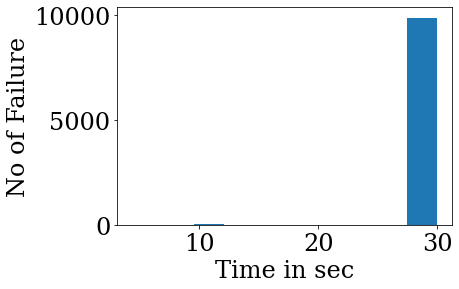

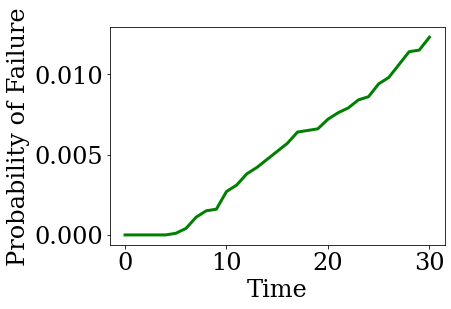

In [12]:
idx = [np.where(y5_a[i,:]>threshold) for i in range(10000)]

count = 0
for i in idx:
    if len(i[0])!=0:
        count += 1
        
print("Probabilty of Failure :", count/len(idx))

ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/2000)
    else:
        ans.append(60000/2000)
        
plt.hist(ans)
plt.xlabel('Time in sec')
plt.ylabel('No of Failure')
plt.show()

pf_count_per_t = set()
prob_fail = []
for i in range(60001):
    colmn = y5_a[:,i]
    ans = np.where(colmn>threshold)
    for i in ans[0]:
        pf_count_per_t.add(i)
        
    no_of_fail = len(pf_count_per_t)
    prob_fail.append(no_of_fail/10000)
    
final_ans = []
for i in range(len(prob_fail)):
    if i%2000 == 0:
        final_ans.append(prob_fail[i])
    
plt.plot(final_ans, linewidth=3, color='green')
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.show()

Probabilty of Failure : 0.0122


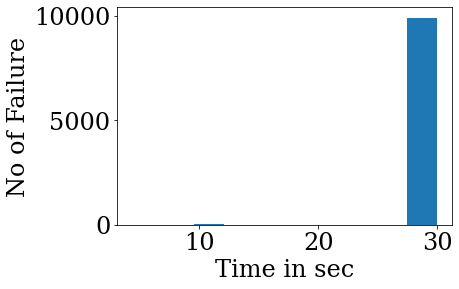

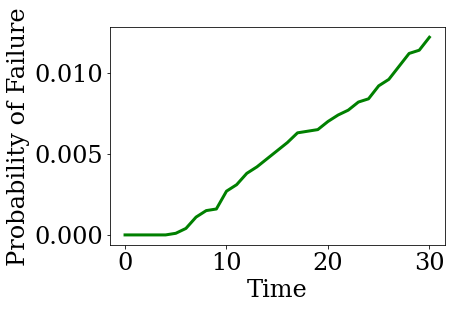

In [13]:
idx_2 = [np.where(y5_f[i,:]>threshold) for i in range(10000)]

count_2 = 0
for i in idx_2:
    if len(i[0])!=0:
        count_2 += 1
        
print("Probabilty of Failure :", count_2/len(idx_2))

ans_2 = []
for i in idx_2:
    if len(i[0])!=0:
        ans_2.append((i[0][0])/2000)
    else:
        ans_2.append(60000/2000)
        
plt.hist(ans_2)
plt.xlabel('Time in sec')
plt.ylabel('No of Failure')
plt.show()

pf_count_per_t_2 = set()
prob_fail_2 = []
for i in range(60001):
    colmn = y5_f[:,i]
    ans_2 = np.where(colmn>threshold)
    for i in ans_2[0]:
        pf_count_per_t_2.add(i)
        
    no_of_fail = len(pf_count_per_t_2)
    prob_fail_2.append(no_of_fail/10000)
    
final_ans_2 = []
for i in range(len(prob_fail_2)):
    if i%2000 == 0:
        final_ans_2.append(prob_fail_2[i])
    
plt.plot(final_ans_2, linewidth=3, color='green')
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.show()

In [14]:
max(prob_fail), max(prob_fail_2)

(0.0123, 0.0122)

In [15]:
index = np.arange(31)

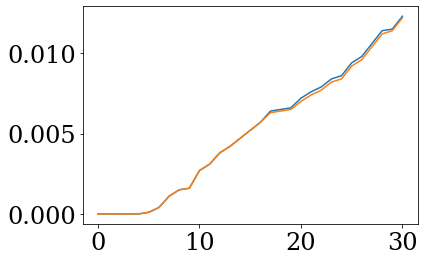

In [16]:
plt.plot(final_ans)
plt.plot(final_ans_2)

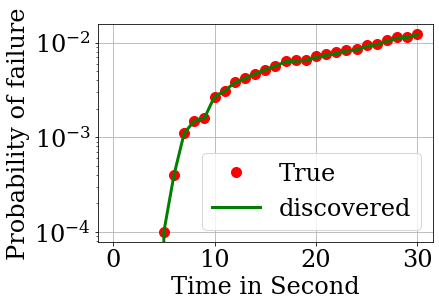

In [17]:
plt.figure()
plt.semilogy(index, final_ans, 'ro', label="True", markersize=10)
plt.semilogy(index, final_ans_2,color='green' ,linewidth=3, label="discovered")
plt.xlabel('Time in Second')
plt.ylabel('Probability of failure')
plt.legend()
plt.grid()
plt.savefig('reliability 3dof.pdf')
plt.show()

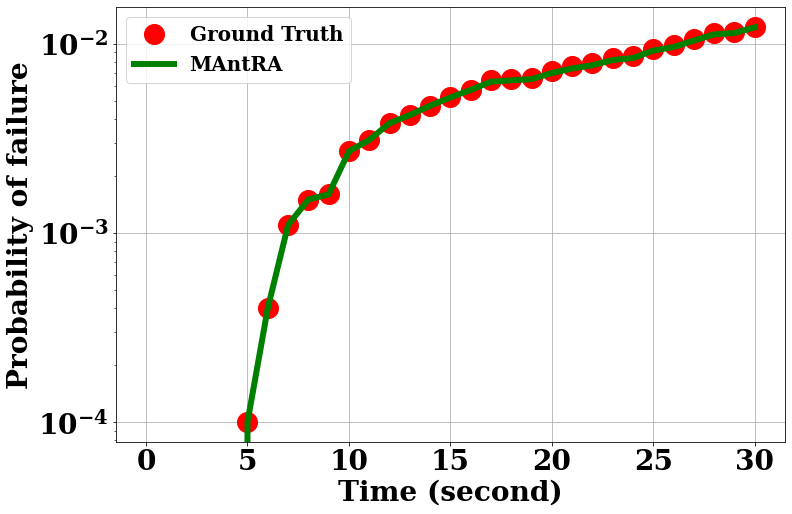

In [19]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 28
plt.figure(figsize = (12,8 ))
plt.semilogy(final_ans, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_ans_2,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=2)
plt.grid()
plt.savefig('reliability 3dof.png')
plt.show()